In [1]:
import networkx as nx
from pymotif import Motif
import pandas as pd 
import datetime
import pytz
import os
import matplotlib
import matplotlib.pyplot as plt
import scipy
import jellyfish
import difflib


In [2]:
df= pd.read_csv('/Users/pometry/Desktop/cleanedData5000/caa')


/var/folders/qh/lc_s3cmd2v1__m12ckks3gnm0000gp/T/ipykernel_7701/4051446640.py:1: DtypeWarning: Columns (0,1,4,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/Users/pometry/Desktop/cleanedData5000/caa')


In [3]:
# df= pd.read_csv('/Users/pometry/Desktop/Features/TemporalNodeList_308242381179042612/partition-0.csv', header=None, names=['ID', 'ts_y', 'ts','bots'])

dfProfile = pd.read_json('/Users/pometry/Desktop/user.json')
dfTempedge= pd.read_csv('/Users/pometry/Desktop/Features/TemporalEdgeList_8600354907254422657/partition-0.csv', header=None,names=['Ignore', 'SourceID','TimeoTweet0','TargetID','TimeoTweet','id','Label'])
dfTempedge['SourceID'] = dfTempedge['SourceID'].astype('string')
dfTempedge['TimeoTweet'] = dfTempedge['TimeoTweet'].astype('string')
dfTempedge["SourceID"] = dfTempedge["SourceID"].str[1:]


In [4]:

dfTwoHop= pd.read_csv('/Users/pometry/Desktop/Features/TwoHopPaths_1400203269312576448/partition-0.csv',header=None, names=['Ignore','SourceID', '2','3'])
dfPageRank = pd.read_csv("/Users/pometry/Desktop/Features/PageRank_40003387513468632/partition-0.csv",header=None,names=['Ignore','SourceID', 'PR'])
dfLabel = pd.read_csv('/Users/pometry/Desktop/label.csv')
dfLabel["id"] = dfLabel["id"].str[1:]
dfDegree = pd.read_csv('/Users/pometry/Desktop/Features/Degree_8931982960468757905/partition-0.csv',header=None, names=['Ignore','SourceID', 'In_degree','Out_degre','Degree'])
dfLTC= pd.read_csv('/Users/pometry/Desktop/Features/LocalTriangleCount_2312698834565981208/partition-0.csv',header=None, names=['SourceID','LTCount'])
dfSLPA= pd.read_csv('/Users/pometry/Desktop/SLPA_8830372364736262341/partition-0.csv',header=None, names=['Ignore','SourceID', 'Memory'])
dfcc = pd.read_csv('/Users/pometry/Desktop/Features/ConnectedComponents_471251733781643197/partition-0.csv',header=None, names=['Ignore','SourceID', 'batch'])


In [5]:
dfInf= pd.read_csv('/Users/pometry/Desktop/Features/Influence_6118975757739670627/partition-0.csv',header=None)

,0,1,2
0,1658781456,20447544,0.930877
1,1658781456,371201568,0.490955
2,1658781456,1719690880,0.774699
3,1658781456,20447545,-0.536559
4,1658781456,2198373120,0.755548
...,...,...,...
318674,1658781456,1371804205401395202,0.000000
318675,1658781456,295693924,0.000000
318676,1658781456,930962549574475777,-0.632070
318677,1658781456,295693920,0.864801


In [7]:
df=df.merge(dfLabel, right_on=['id'],left_on=['author_id'])
df = df[df.label_x != 'None']

In [88]:
# dfcc = dfcc[dfcc['batch']==12]


# Friends Count Follower Count Ratio & Tweets Listed Ratio

In [16]:
dfProfileFF = dfProfile.filter(['id', 'public_metrics'])
pd.set_option('display.max_colwidth', None)
dfProfileFF['public_metrics']= dfProfileFF['public_metrics'].astype('string')
dfProfileFF[['0','1','2','3','4']] = dfProfileFF['public_metrics'].str.split(pat = ': ', expand = True)
dfProfileFF['1']= dfProfileFF['1'].str.extract('(^\d*)')
dfProfileFF['2']= dfProfileFF['2'].str.extract('(^\d*)')
dfProfileFF['3']= dfProfileFF['3'].str.extract('(^\d*)')
dfProfileFF['4']= dfProfileFF['4'].str.extract('(^\d*)')


print(dfProfileFF.loc[[0]])


                     id  \
0  u1217628182611927040   

                                                                               public_metrics  \
0  {'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}   

                    0     1    2     3   4  
0  {'followers_count'  7316  215  3098  69  


In [17]:
dfProfile['f/f']=dfProfileFF['2'].astype('int64')/dfProfileFF['1'].astype('int64')
dfProfile['l/t']= dfProfileFF['4'].astype('int64')/dfProfileFF['3'].astype('int64')


# Username / Name


In [18]:

dfProfile['username']= dfProfile['username'].astype('string')
dfProfile['name']= dfProfile['name'].astype('string')
dfProfile['name'] = dfProfile['name'].str.replace(" ","")
dfProfile["name"] = dfProfile["name"].str.lower()
dfProfile["username"] = dfProfile["username"].str.lower()

dfProfile['n/u']= dfProfile.apply(lambda x: difflib.SequenceMatcher(None, str(x['name']), str(x['username'])).ratio(), axis=1)


# Tweets And Account age


In [19]:
dfProfileTA = dfProfile

In [21]:
df['Occurence'] = df['author_id'].map(df['author_id'].value_counts())
df.sort_values(by ='Occurence',ascending = False, inplace= True)
df['author_id']=df['author_id'].astype('string')
dfProfileTA['id']=dfProfileTA['id'].astype('string')
dfProfileTA['id'] = dfProfileTA['id'].str[1:]



In [22]:
dfProfileTA = dfProfileTA.merge(df, how='inner', left_on='id', right_on='author_id')
# dfProfileTA =dfProfileTA[dfProfileTA['Occurence']>=5]

In [90]:
dfProfileTA.dtypes

created_at_x           datetime64[ns, UTC]
description                         object
entities_x                          object
id                                   int64
location                            object
name                                string
pinned_tweet_id                    float64
profile_image_url                   object
protected                             bool
public_metrics_x                    object
url                                 object
username                            string
verified                              bool
withheld                            object
f/f                                float64
l/t                                float64
n/u                                float64
Unnamed: 0                          object
author_id                           string
conversation_id                    float64
created_at_y                       float64
entities_y                          object
id_x                               float64
in_reply_to

In [24]:
dfProfileTA.sort_values('Occurence')
dfProfileTA['DateDiff']=dfProfileTA['created_at_x'].apply(lambda x:x.tz_localize(None))
dfProfileTA['DateDiff']=dfProfileTA['DateDiff'].apply(lambda x:x.timestamp())




In [25]:
dfProfileTA

,created_at_x,description,entities_x,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics_x,...,lang,public_metrics_y,referenced_tweets,source,text,label_x,id_y,label_y,Occurence,DateDiff
0,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,en,"{'retweet_count': 26, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502425034840678402'}]",Twitter Web App,RT @whybansal: I've defended my PhD :) A big thank you to my advisers @boazbaraktcs and @neurobongo. \n\nYou can see my talk here https://t.c…,human,1217628182611927040,human,4,1.579140e+09
1,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,en,"{'retweet_count': 66, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502437837978755075'}]",Twitter Web App,"RT @PreetumNakkiran: this was a great read; particularly relevant to some of the ""debates"" in the current ML community, and interesting his…",human,1217628182611927040,human,4,1.579140e+09
2,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,en,"{'retweet_count': 8245, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502061135725568003'}]",Twitter Web App,"RT @BarackObama: Over the last few weeks, we’ve seen people, organizations, and companies around the world stepping up to support the peopl…",human,1217628182611927040,human,4,1.579140e+09
3,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 

In [26]:
dfProfileTA['DateDiff']=(my_date-dfProfileTA['DateDiff'])/dfProfileTA['Occurence']

In [27]:
dfProfileTA = dfProfileTA.merge(dfLabel, how='inner', right_on='id', left_on='id')
dfProfileTA

,created_at_x,description,entities_x,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics_x,...,public_metrics_y,referenced_tweets,source,text,label_x,id_y,label_y,Occurence,DateDiff,label
0,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,"{'retweet_count': 26, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502425034840678402'}]",Twitter Web App,RT @whybansal: I've defended my PhD :) A big thank you to my advisers @boazbaraktcs and @neurobongo. \n\nYou can see my talk here https://t.c…,human,1217628182611927040,human,4,1.977602e+07,human
1,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,"{'retweet_count': 66, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502437837978755075'}]",Twitter Web App,"RT @PreetumNakkiran: this was a great read; particularly relevant to some of the ""debates"" in the current ML community, and interesting his…",human,1217628182611927040,human,4,1.977602e+07,human
2,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,"{'retweet_count': 8245, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502061135725568003'}]",Twitter Web App,"RT @BarackObama: Over the last few weeks, we’ve seen people, organizations, and companies around the world stepping up to support the peopl…",human,1217628182611927040,human,4,1.977602e+07,human
3,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, '

In [28]:
dfProfileTABO= dfProfileTA[dfProfileTA['label']=='bot']
dfProfileTAHUM= dfProfileTA[dfProfileTA['label']=='human']

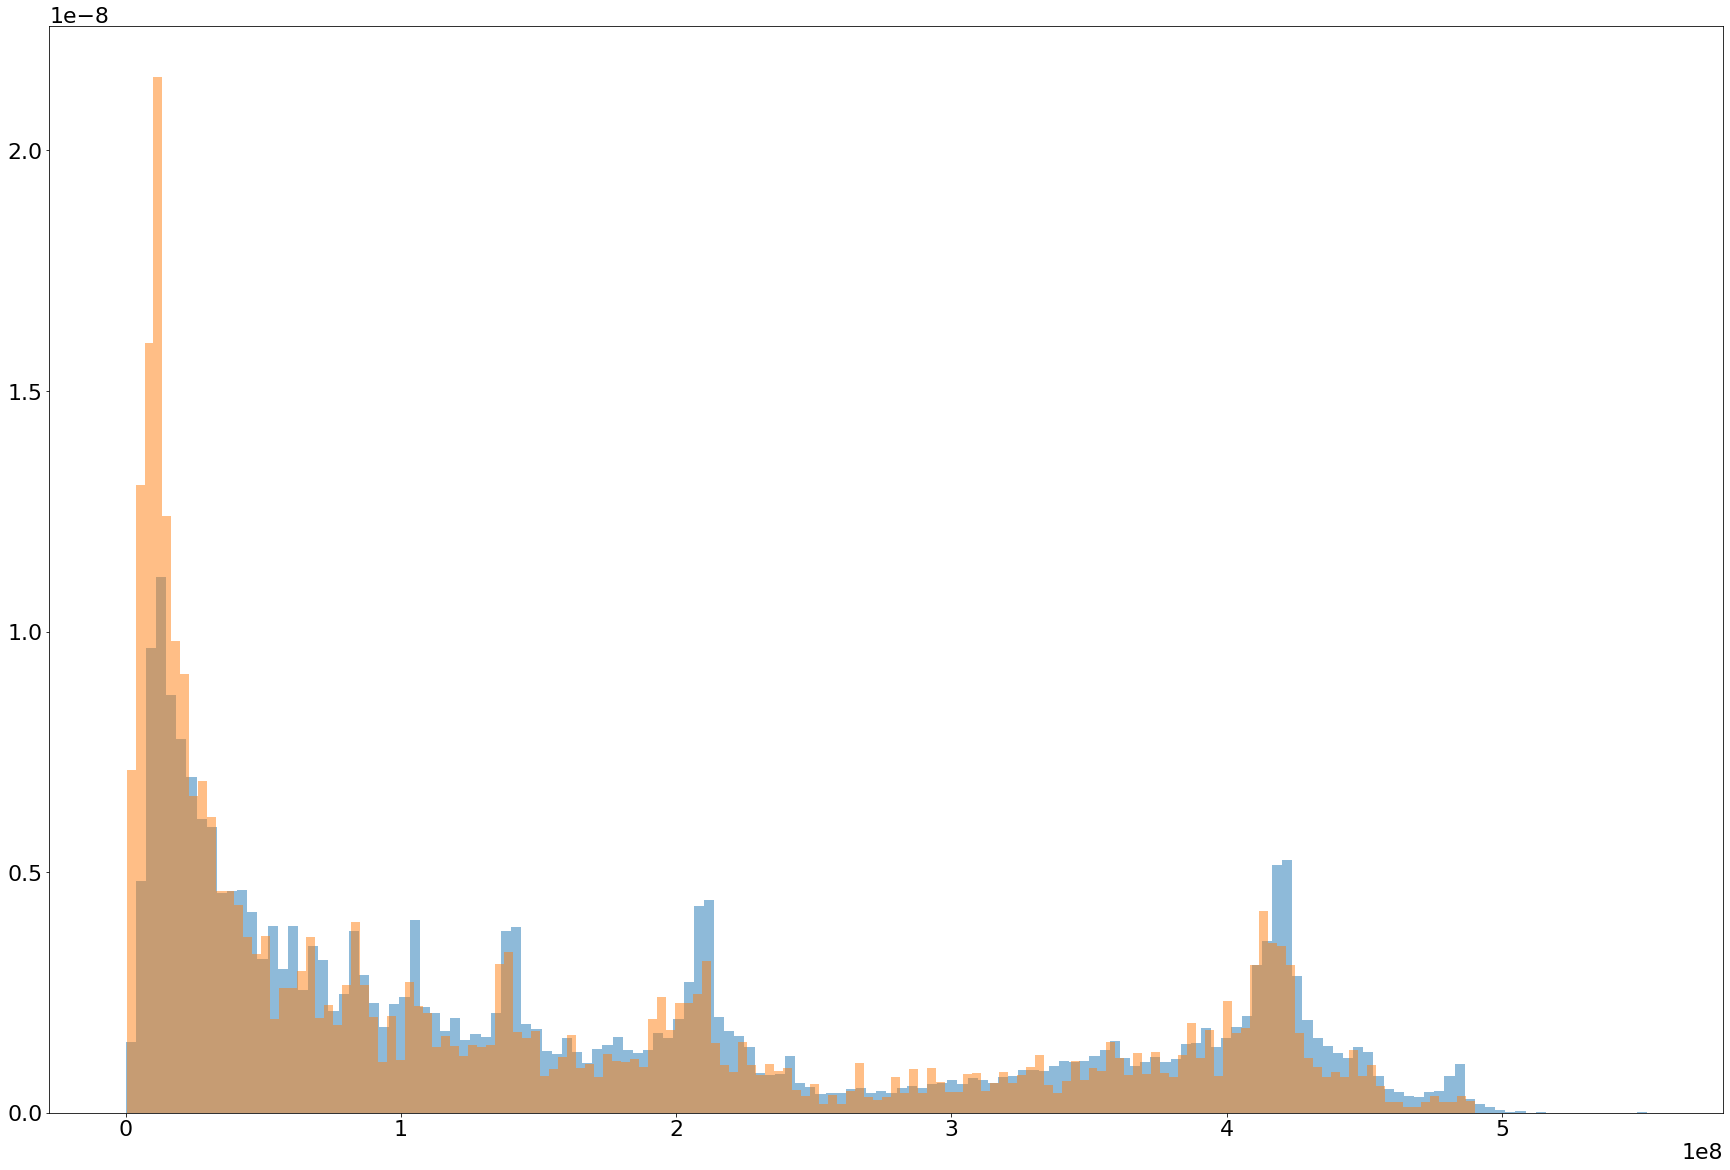

In [29]:
plt.figure(figsize=[30,20])

plt.rcParams.update({'font.size': 22})


plt.hist(dfProfileTAHUM['DateDiff'],weights=dfProfileTAHUM['DateDiff'] / len(dfProfileTAHUM['DateDiff']), density=True,alpha = 0.5,bins=150)
plt.hist(dfProfileTABO['DateDiff'],weights=dfProfileTABO['DateDiff'] / len(dfProfileTABO['DateDiff']), density=True,alpha = 0.5,bins=150)
plt.show()

# Next


##### 

Temporal Node List


In [30]:
hum = df[df.label_x=='human']


In [31]:
bo = df[df.label_x=='bot']

bo

,Unnamed: 0,author_id,conversation_id,created_at,entities,id_x,in_reply_to_user_id,lang,public_metrics,referenced_tweets,source,text,label_x,id_y,label_y,Occurence
1048921,1168681,1374636733682229248,1.502897e+18,1.647154e+09,"{'hashtags': [{'start': 129, 'end': 139, 'tag': 'indiegame'}], 'urls': [{'start': 105, 'end': 128, 'url': 'https://t.co/c5QOqo1bEb', 'expanded_url': 'https://itunes.apple.com/nz/app/erase-invaders/id871264927?mt=8', 'display_url': 'itunes.apple.com/nz/app/erase-i…'}], 'mentions': [{'start': 3, 'end': 19, 'username': 'IndieVideoGames', 'id': '3024607164'}]}",1.502897e+18,NaN,en,"{'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502895767031267328'}]",Twitter,RT @IndieVideoGames: Download ERASE INVADERS! Not your average retro-inspired game. Let the chaos begin! https://t.co/c5QOqo1bEb #indiegame…,bot,1374636733682229248,bot,96
1048958,1168628,1374636733682229248,1.502904e+18,1.647155e+09,"{'hashtags': [{'start': 54, 'end': 70, 'tag': 'gamedevelopment'}, {'start': 71, 'end': 79, 'tag': 'gamedev'}, {'start': 80, 'end': 89, 'tag': 'indiedev'}, {'start': 90, 'end': 100, 'tag': 'indiegame'}], 'urls': [{'start': 101, 'end': 124, 'url': 'https://t.co/uG0KYrVDac', 'expanded_url': 'https://twitter.com/TempleDoorGames/status/1501958769789440000/photo/1', 'display_url': 'pic.twitter.com/uG0KYrVDac'}], 'mentions': [{'start': 3, 'end': 19, 'username': 'TempleDoorGames', 'id': '1098009082886148096'}]}",1.502904e+18,NaN,en,"{'retweet_count': 273, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1501958769789440000'}]",Twitter,"RT @TempleDoorGames: Ah yes, the ol' reliable boy. 😂\n\n#gamedevelopment #gamedev #indiedev #indiegame https://t.co/uG0KYrVDac",bot,1374636733682229248,bot,96
1048960,1168623,1374636733682229248,1.502905e+18,1.647155e+09,"{'hashtags': [{'start': 58, 'end': 68, 'tag': 'indiegame'}, {'start': 69, 'end': 77, 'tag': 'gamedev'}, {'start': 78, 'end': 87, 'tag': 'indiedev'}, {'start': 88, 'end': 94, 'tag': 'retro'}, {'start': 95, 'end': 111, 'tag': 'indievideogames'}, {'start': 112, 'end': 116, 'tag': 'ios'}, {'start': 117, 'end': 128, 'tag': 'indiegames'}], 'mentions': [{'start': 3, 'end': 12, 'username': 'scpwords', 'id': '750763458719653888'}]}",1.502905e+18,NaN,en,"{'retweet_count': 7, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502904632057679873'}]",Twitter,RT @scpwords: DINO MAKER! Make Dinos and Levels to share! #indiegame #gamedev #indiedev #retro #indievideogames #ios #indiegames #videogame…,bot,1374636733682229248,bot,96
1048959,1168624,1374636733682229248,1.502905e+18,1.647155e+09,"{'hashtags': [{'start': 23, 'end': 42, 'tag': 'screenshotsaturday'}, {'start': 98, 'end': 103, 'tag': 'DOOM'}], 'urls': [{'start': 104, 'end': 127, 'url': 'https://t.co/IQ4mCkQIYD', 'expanded_url': 'https://twitter.com/kinsie/status/1502859928347680773/video/1', 'display_url': 'pic.twitter.com/IQ4mCkQIYD'}], 'mentions': [{'start': 3, 'end': 10, 'username': 'kinsie', 'id': '15404896'}]}",1.502905e+18,NaN,en,"{'retweet_count': 15, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502859928347680773'}]",Twitter,"RT @kinsie: It's still #screenshotsaturday somewhere, and Shadsy is still a mad genius. Sound on! #DOOM https://t.co/IQ4mCkQIYD",bot,1374636733682229248,bot,96
1048957,1168629,1374636733682229248,1.502904e+18,1.647155e+09,"{'urls': [{'start': 107, 'end': 130, 'url': 'https://t.co/irhjzFUbWN', 'expanded_url': 'https://bit.ly/FloorIsWhat', 'display_url': 'bit.ly/FloorIsWhat'}], 'mentions': [{'start': 3, 'end': 16, 'username': 'Pyramid_Lake', 'id': '1080293632949784576'}]}",1.502904e+18,NaN,en,"{'retweet_count': 12, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502747628953559042'}]",Twitter,RT @Pyramid_Lake: Santa is sad he let the elves down with third place in today's tournament...\n\nWishlist 👉 https:/

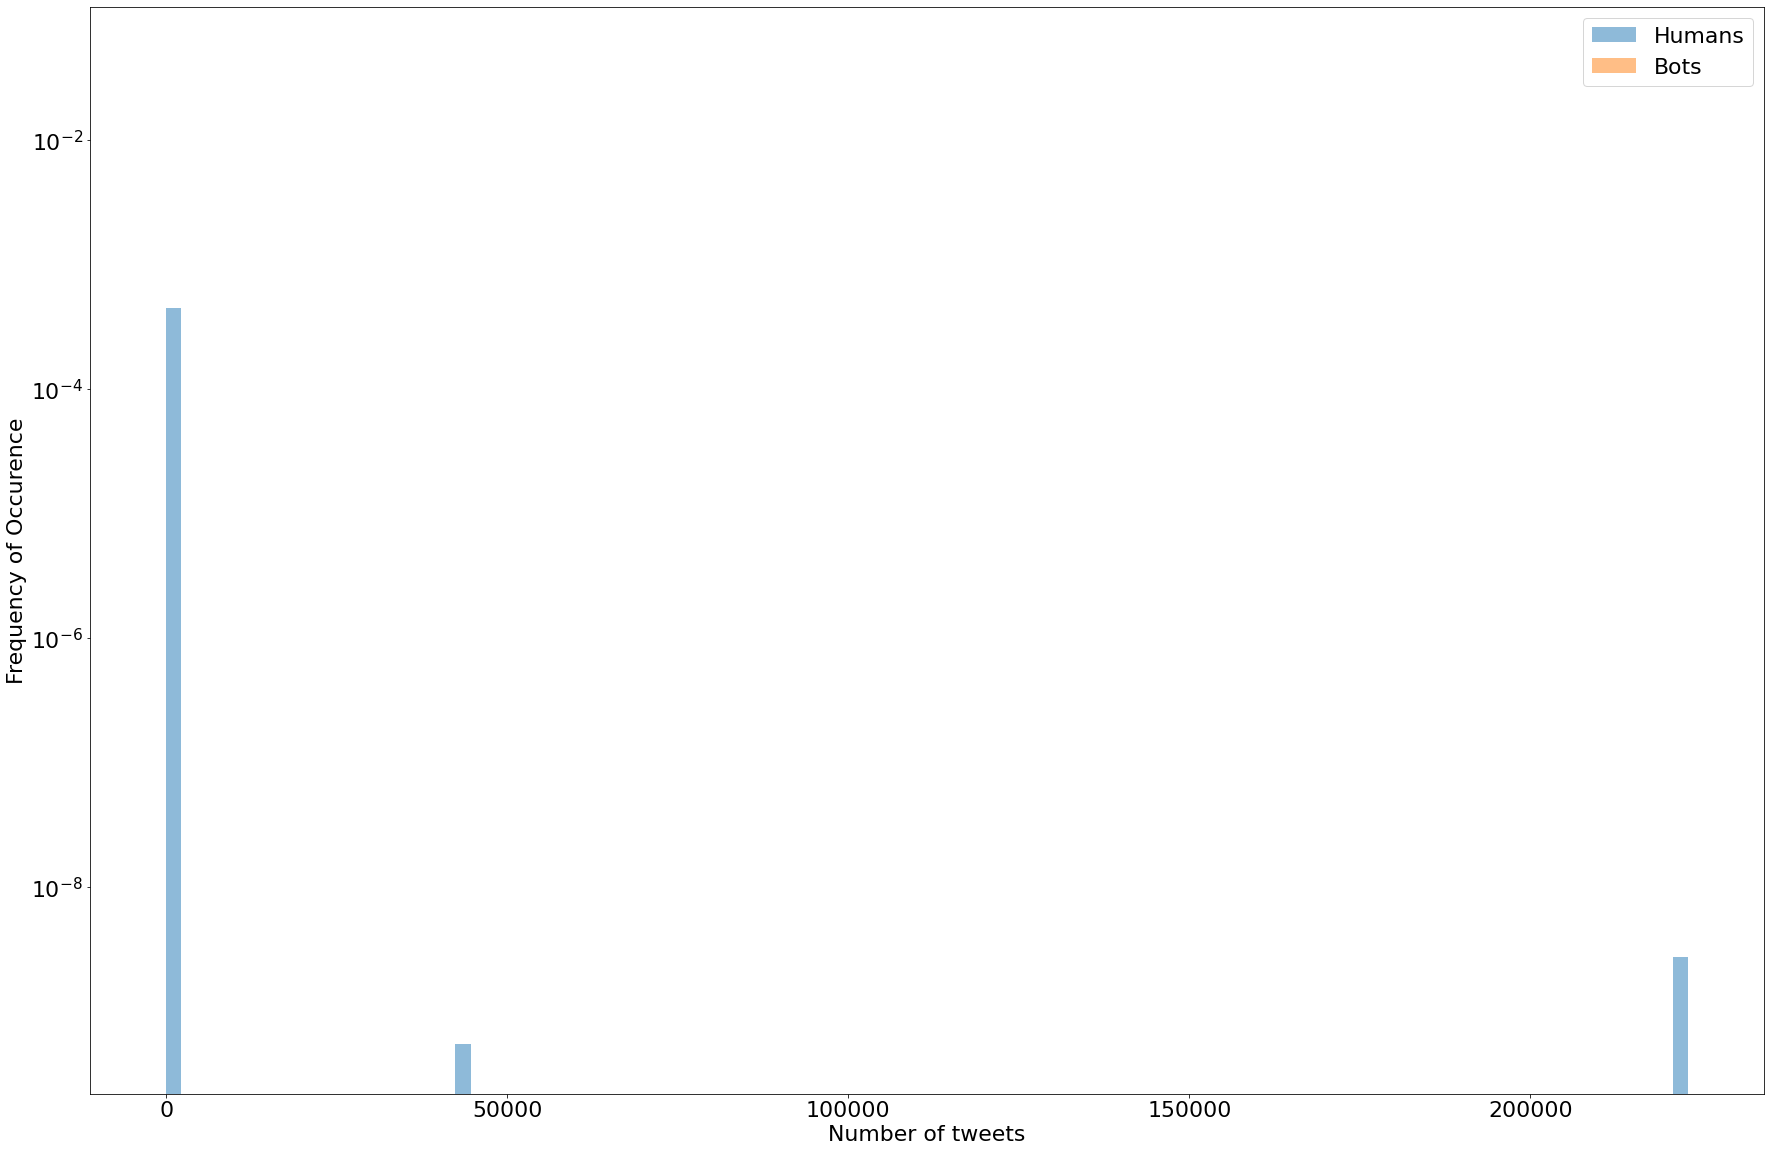

In [32]:
plt.figure(figsize=[30,20])
plt.rcParams.update({'font.size': 22})

matplotlib.pyplot.hist(hum['Occurence'],density=True,alpha = 0.5,bins=100,log=True)
matplotlib.pyplot.hist(bo['Occurence'],density=True, alpha = 0.5,bins=100,log=True)
plt.legend(["Humans","Bots"])
plt.xlabel("Number of tweets")
plt.ylabel("Frequency of Occurence")

plt.savefig('Number of Tweets per User.pdf', bbox_inches='tight')

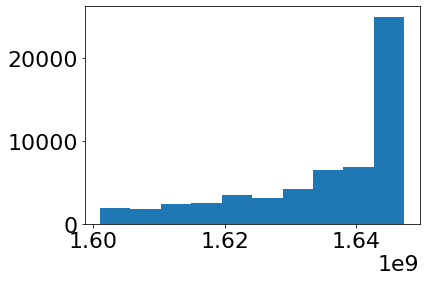

In [33]:
plt.hist(bo['created_at'])
plt.show()

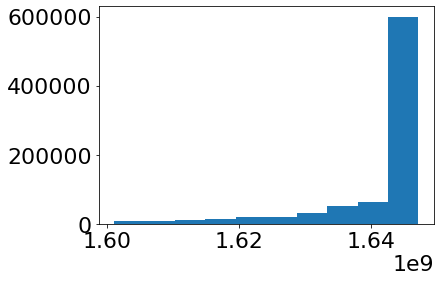

In [34]:
plt.hist(hum['created_at'])
plt.show()

In [35]:
bo2=bo.sort_values(['author_id','created_at'],ascending=True).groupby('author_id').head(100)
bo2['diff'] =   bo2["created_at"] - bo2['created_at'].shift()
bo2 = bo2.sort_values(['author_id','created_at'])
bo2['match'] = bo2.author_id.eq(bo2.author_id.shift())
bo2.loc[bo2['match'] ==False , 'diff'] = None

#bo2= bo2[bo2['diff']<100000]
#bo2['ts'] = pd.to_datetime(bo2['ts'],unit='s')


In [36]:
hum2=hum.sort_values(['author_id','created_at'],ascending=True).groupby('author_id').head(100)
hum2['diff'] =  hum2["created_at"] - hum2['created_at'].shift()
hum2 = hum2.sort_values(['author_id','created_at'])
hum2['match'] = hum2.author_id.eq(hum2.author_id.shift())
hum2.loc[hum2['match'] ==False , 'diff'] = None

# hum2= hum2[hum2['diff']<100000]
#hum2['ts'] = pd.to_datetime(hum2['ts'],unit='s')



# Difference between Time tweet feature

In [37]:

df=df.sort_values(['author_id','created_at'],ascending=True).groupby('author_id').head(200)
df

,Unnamed: 0,author_id,conversation_id,created_at,entities,id_x,in_reply_to_user_id,lang,public_metrics,referenced_tweets,source,text,label_x,id_y,label_y,Occurence
1153941,1362093,1000016040288555009,1.502940e+18,1.647164e+09,"{'urls': [{'start': 93, 'end': 116, 'url': 'https://t.co/2xw0g7ITXE', 'expanded_url': 'http://bit.ly/3sDlWV7', 'display_url': 'bit.ly/3sDlWV7'}], 'mentions': [{'start': 3, 'end': 11, 'username': '888Tron', 'id': '1070247376722501633'}], 'hashtags': [{'start': 43, 'end': 49, 'tag': 'bonus'}]}",1.502940e+18,NaN,en,"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502925664843964419'}]",Twitter Web App,"RT @888Tron: Top matches for today!\n\n🎁100% #bonus on your first deposit, sign up and get it: https://t.co/2xw0g7ITXE\n💣Free bet 20%: https:/…",human,1000016040288555009,human,4
1153942,1362092,1000016040288555009,1.502940e+18,1.647164e+09,"{'mentions': [{'start': 3, 'end': 11, 'username': '888Tron', 'id': '1070247376722501633'}]}",1.502940e+18,NaN,en,"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502727365490794500'}]",Twitter Web App,"RT @888Tron: Our players got over $5,000 in cashback today, nothing to wager! 🤑\nSpin the slots and get dollars without wagering!\n\nGiving bo…",human,1000016040288555009,human,4
1153943,1362089,1000016040288555009,1.502940e+18,1.647164e+09,"{'mentions': [{'start': 3, 'end': 11, 'username': '888Tron', 'id': '1070247376722501633'}], 'hashtags': [{'start': 92, 'end': 106, 'tag': 'CryptoSociety'}, {'start': 107, 'end': 122, 'tag': 'cryptocurrency'}, {'start': 123, 'end': 137, 'tag': 'cryptotrading'}]}",1.502940e+18,NaN,en,"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502694927913914369'}]",Twitter Web App,"RT @888Tron: There are currently 12,358 open crypto jobs, 25% opened in the past week! 🤩👍🏻\n\n#CryptoSociety #cryptocurrency #cryptotrading #…",human,1000016040288555009,human,4
1153944,1362088,1000016040288555009,1.502940e+18,1.647164e+09,"{'mentions': [{'start': 3, 'end': 11, 'username': '888Tron', 'id': '1070247376722501633'}], 'hashtags': [{'start': 69, 'end': 78, 'tag': 'Biathlon'}]}",1.502940e+18,NaN,en,"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502664013070704643'}]",Twitter Web App,"RT @888Tron: France's Kentin Fillon Mayeux won the overall World Cup #Biathlon title for the 2021/22 season ahead of schedule, winning the…",human,1000016040288555009,human,4
394142,2184688,100002112,1.492156e+18,1.644593e+09,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WPCareySchool', 'name': 'W. P. Carey School', 'id': 38289217, 'id_str': '38289217', 'indices': [21, 35]}, {'screen_name': 'amandamull', 'name': 'Amanda Mull', 'id': 25198779, 'id_str': '25198779', 'indices': [122, 133]}], 'urls': []}",1.492156e+18,100002112.0,en,"{'retweet_count': 0, 'reply_count': None, 'like_count': 0, 'quote_count': None}",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",".Hitendra Chaturvedi @WPCareySchool says we are nearing $1 trillion in product returns. We're talking with Chaturvedi and @amandamull about how generous return policies have created a tsunami of products that end up in landfills, incinerators, or shipped overseas.",human,100002112,human,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653213,1217519,99998749,1.502687e+18,1.647103e+09,"{'annotations': [{'start': 85, 'end': 93, 'probability': 0.8258000000000001, 'type': 'Place', 'normalized_text': 'Hyderabad'}], 'mentions': [{'start': 3, 'end': 15, 'username': 'rajesh_tara', 'id': '1312417411'}]}",1.502687e+18,NaN,en,"{'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502631523199029254'}]",Twitter for Android,RT @rajesh_tara: Enjoy This Lovely Authentic Telugu Sprea

In [38]:
dfTime=df.sort_values(['author_id','created_at'],ascending=True).groupby('author_id').head(200)
dfTime['diff'] =   dfTime["created_at"] - dfTime['created_at'].shift()
dfTime['match'] = dfTime.author_id.eq(dfTime.author_id.shift())
dfTime.loc[dfTime['match'] ==False , 'diff'] = None 


In [39]:
dfTime

,Unnamed: 0,author_id,conversation_id,created_at,entities,id_x,in_reply_to_user_id,lang,public_metrics,referenced_tweets,source,text,label_x,id_y,label_y,Occurence,diff,match
1153941,1362093,1000016040288555009,1.502940e+18,1.647164e+09,"{'urls': [{'start': 93, 'end': 116, 'url': 'https://t.co/2xw0g7ITXE', 'expanded_url': 'http://bit.ly/3sDlWV7', 'display_url': 'bit.ly/3sDlWV7'}], 'mentions': [{'start': 3, 'end': 11, 'username': '888Tron', 'id': '1070247376722501633'}], 'hashtags': [{'start': 43, 'end': 49, 'tag': 'bonus'}]}",1.502940e+18,NaN,en,"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502925664843964419'}]",Twitter Web App,"RT @888Tron: Top matches for today!\n\n🎁100% #bonus on your first deposit, sign up and get it: https://t.co/2xw0g7ITXE\n💣Free bet 20%: https:/…",human,1000016040288555009,human,4,NaN,<NA>
1153942,1362092,1000016040288555009,1.502940e+18,1.647164e+09,"{'mentions': [{'start': 3, 'end': 11, 'username': '888Tron', 'id': '1070247376722501633'}]}",1.502940e+18,NaN,en,"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502727365490794500'}]",Twitter Web App,"RT @888Tron: Our players got over $5,000 in cashback today, nothing to wager! 🤑\nSpin the slots and get dollars without wagering!\n\nGiving bo…",human,1000016040288555009,human,4,9.0,True
1153943,1362089,1000016040288555009,1.502940e+18,1.647164e+09,"{'mentions': [{'start': 3, 'end': 11, 'username': '888Tron', 'id': '1070247376722501633'}], 'hashtags': [{'start': 92, 'end': 106, 'tag': 'CryptoSociety'}, {'start': 107, 'end': 122, 'tag': 'cryptocurrency'}, {'start': 123, 'end': 137, 'tag': 'cryptotrading'}]}",1.502940e+18,NaN,en,"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502694927913914369'}]",Twitter Web App,"RT @888Tron: There are currently 12,358 open crypto jobs, 25% opened in the past week! 🤩👍🏻\n\n#CryptoSociety #cryptocurrency #cryptotrading #…",human,1000016040288555009,human,4,8.0,True
1153944,1362088,1000016040288555009,1.502940e+18,1.647164e+09,"{'mentions': [{'start': 3, 'end': 11, 'username': '888Tron', 'id': '1070247376722501633'}], 'hashtags': [{'start': 69, 'end': 78, 'tag': 'Biathlon'}]}",1.502940e+18,NaN,en,"{'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502664013070704643'}]",Twitter Web App,"RT @888Tron: France's Kentin Fillon Mayeux won the overall World Cup #Biathlon title for the 2021/22 season ahead of schedule, winning the…",human,1000016040288555009,human,4,3.0,True
394142,2184688,100002112,1.492156e+18,1.644593e+09,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WPCareySchool', 'name': 'W. P. Carey School', 'id': 38289217, 'id_str': '38289217', 'indices': [21, 35]}, {'screen_name': 'amandamull', 'name': 'Amanda Mull', 'id': 25198779, 'id_str': '25198779', 'indices': [122, 133]}], 'urls': []}",1.492156e+18,100002112.0,en,"{'retweet_count': 0, 'reply_count': None, 'like_count': 0, 'quote_count': None}",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",".Hitendra Chaturvedi @WPCareySchool says we are nearing $1 trillion in product returns. We're talking with Chaturvedi and @amandamull about how generous return policies have created a tsunami of products that end up in landfills, incinerators, or shipped overseas.",human,100002112,human,5,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653213,1217519,99998749,1.502687e+18,1.647103e+09,"{'annotations': [{'start': 85, 'end': 93, 'probability': 0.8258000000000001, 'type': 'Place', 'normalized_text': 'Hyderabad'}], 'mentions': [{'start': 3, 'end': 15, 'username': 'rajesh_tara', 'id': '1312417411'}]}",1.502687e+18,NaN,en,"{'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502631523199029254'}]",Twitter for 

In [40]:
dfTime['diff'] = dfTime['diff'].fillna(0)
dfTime= dfTime.groupby(['author_id'])['diff'].mean().to_frame()
dfTime.reset_index(inplace=True)
dfTime

,author_id,diff
0,1000016040288555009,5.000000
1,100002112,68335.600000
2,1000022414401695745,955201.818182
3,1000028117430304769,30.500000
4,1000031187824463872,4834.285714
...,...,...
111860,999947328621395968,0.000000
111861,999981841909153793,562961.000000
111862,999982108499210240,95410.555556
111863,99998749,5917.166667


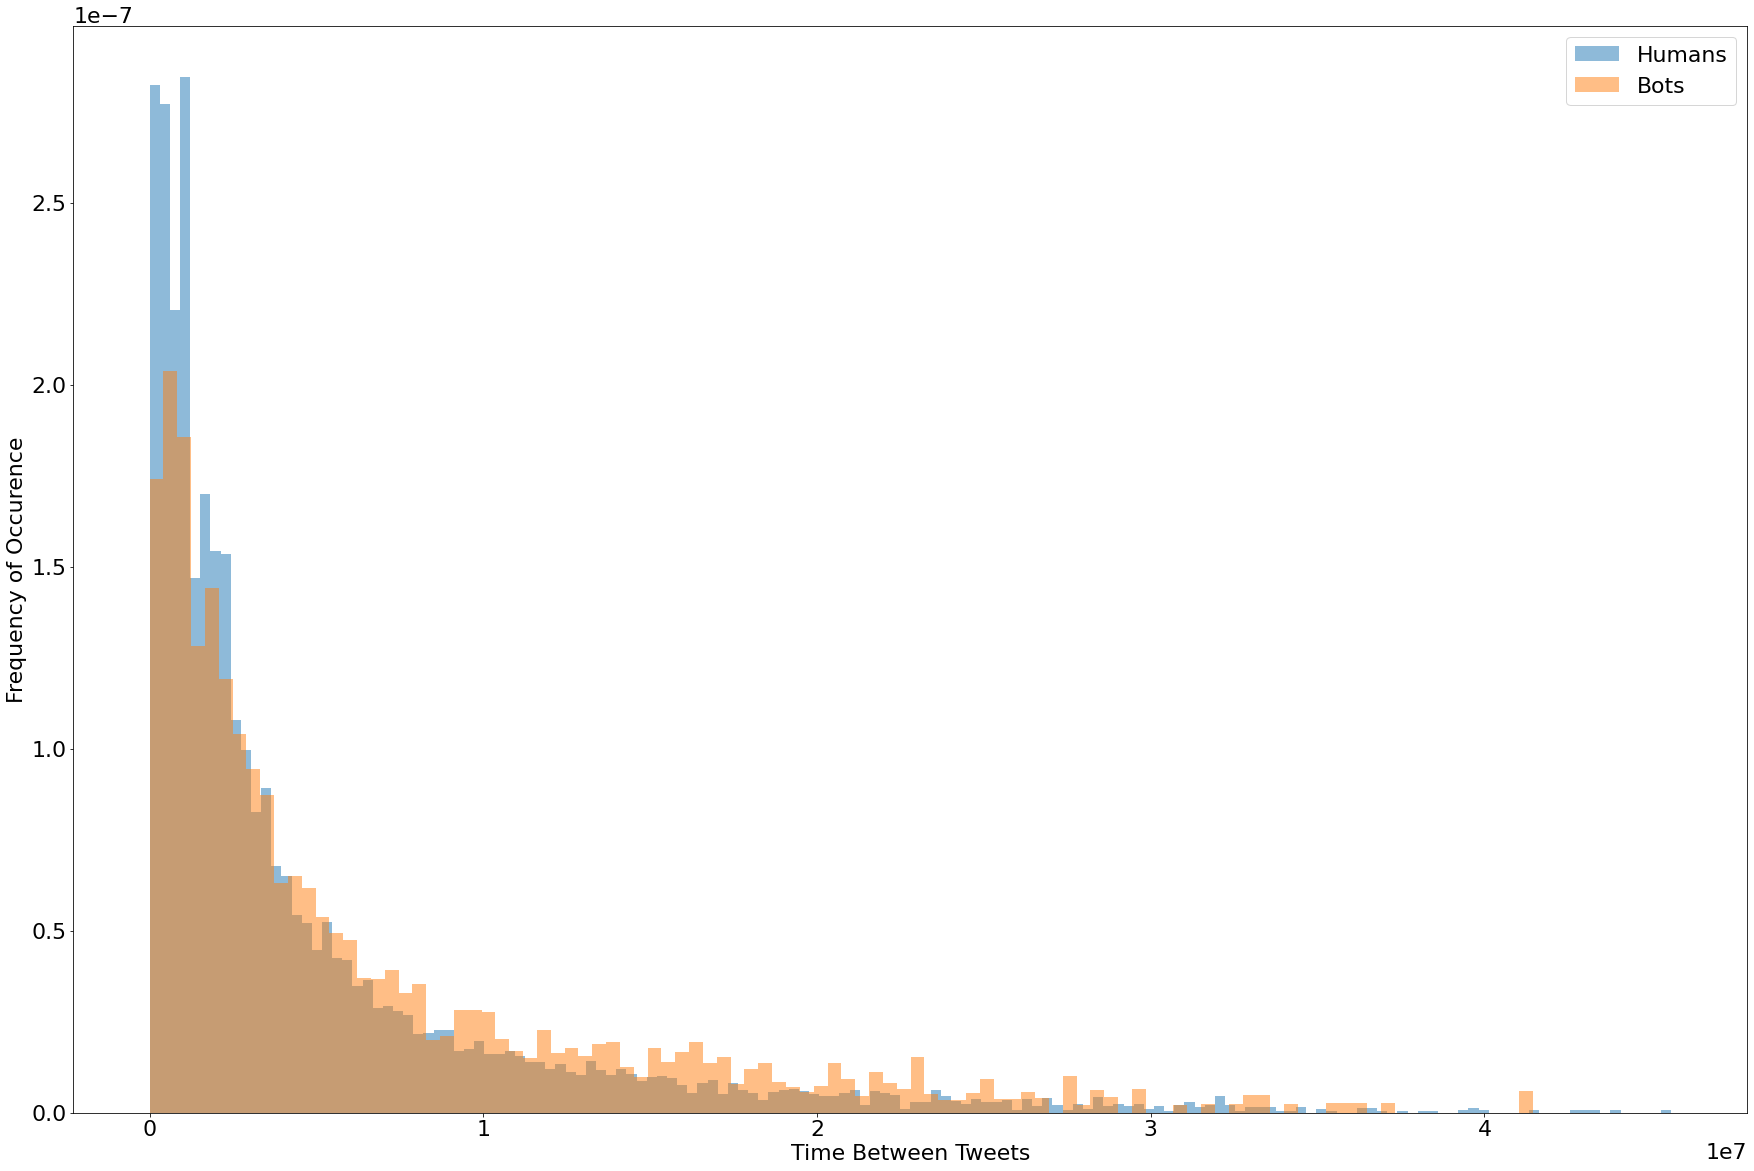

In [41]:
plt.figure(figsize=[30,20])

plt.rcParams.update({'font.size': 22})

matplotlib.pyplot.hist(hum2['diff'],weights=hum2['diff'] / len(hum2['diff']), density=True,alpha = 0.5,bins=150)
matplotlib.pyplot.hist(bo2['diff'], weights=bo2['diff'] / len(bo2['diff']),density=True,alpha = 0.5,bins=100)
plt.ylabel("Frequency of Occurence")
plt.xlabel("Time Between Tweets")
plt.legend(["Humans","Bots"])

plt.savefig('Time between Tweets.pdf',bbox_inches='tight')

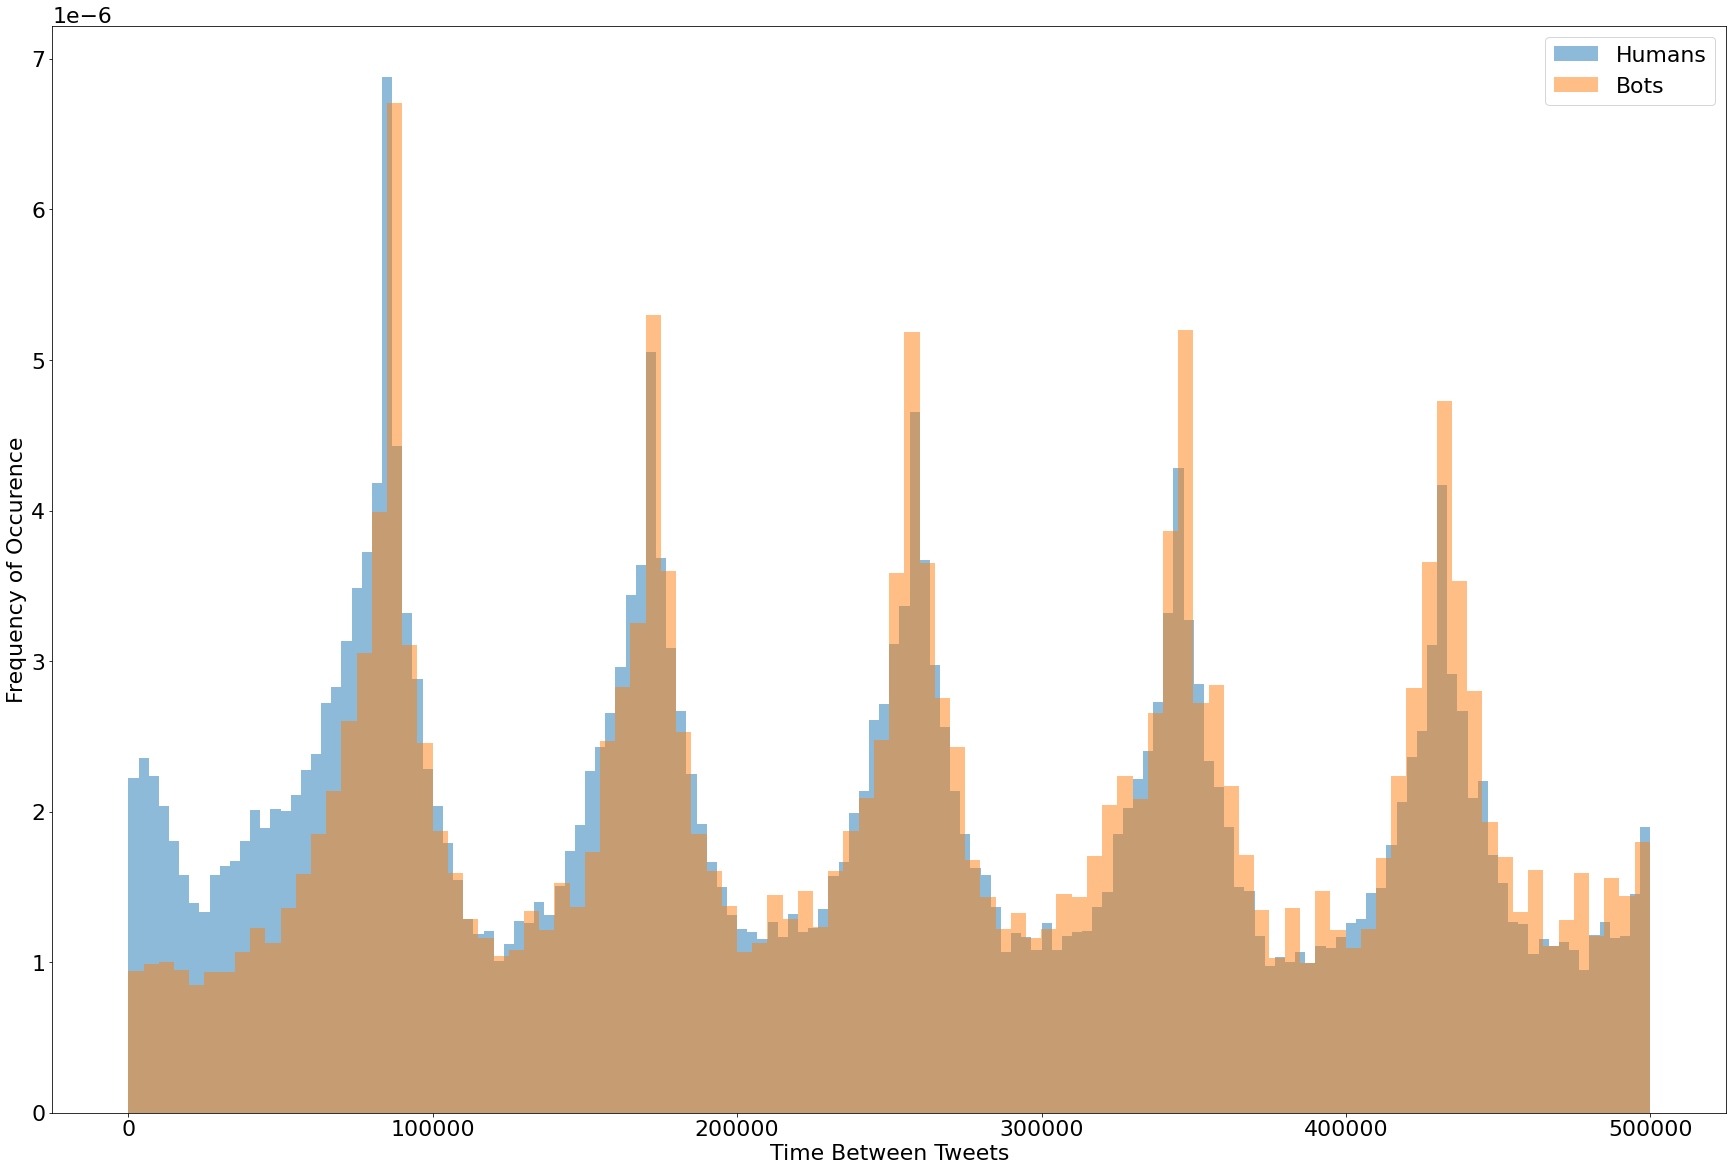

In [42]:
smallbo = bo2[bo2['diff'] <= 500000]  
smallhum = hum2[hum2['diff'] <= 500000]  



plt.figure(figsize=[30,20])

plt.rcParams.update({'font.size': 22})

matplotlib.pyplot.hist(smallhum['diff'], weights=smallhum['diff'] / len(smallhum.columns),density=True,alpha = 0.5,bins=150)

matplotlib.pyplot.hist(smallbo['diff'], weights=smallbo['diff'] / len(smallbo['diff']),density=True,alpha = 0.5,bins=100)
plt.ylabel("Frequency of Occurence")
plt.xlabel("Time Between Tweets")
plt.legend(["Humans","Bots"])

plt.savefig('Time between Tweets.pdf',bbox_inches='tight')

In [43]:
dfLabel = dfLabel.rename(columns={"id":"SourceID", "label":"Label"})


Temporal Edge List

In [44]:
dfTempedge['SourceID'] = dfTempedge['SourceID'].astype('string')
dfLabel['SourceID'] = dfLabel['SourceID'].astype('string')

dfTempedge = dfTempedge.merge(dfLabel[['SourceID','Label']],how= 'left' ,on='SourceID')

In [45]:
dfTempedge.drop('Label_x',axis= 1,inplace=True)
dfTempedge=dfTempedge.rename(columns={"Label_y":"Label"})



In [46]:
dfTwoHop = dfTwoHop[dfTwoHop['SourceID'] != dfTwoHop['3']]
dfTwoHop = dfTwoHop[dfTwoHop['2'] != dfTwoHop['3']]
dfTwoHop = dfTwoHop[dfTwoHop['SourceID'] != dfTwoHop['2']]


In [47]:
dfLabel['SourceID'] = dfLabel['SourceID'].astype('Int64')


In [48]:
Appenddf=dfTwoHop[['Ignore','2','3']].copy()
Appenddf=Appenddf.rename(columns={"2":"SourceID","3":"2"})
dfTwoHop = dfTwoHop.drop('3', axis=1)
dfTwoHop = pd.concat([dfTwoHop,Appenddf],axis=0)


In [49]:
dfTempedge['SourceID'] = dfTempedge['SourceID'].astype('int64')
dfTempedge['TargetID'] = dfTempedge['TargetID'].astype('int64')


In [50]:
dfTwoHop = dfTwoHop.merge(dfLabel[['SourceID', 'Label']], on='SourceID')
dfTwoHop=dfTwoHop.rename(columns={"2":"TargetID"})
dfLabel = dfLabel.rename(columns={"SourceID":"TargetID"})
dfTwoHop = dfTwoHop.merge(dfLabel[['TargetID', 'Label']], on='TargetID')

dfTwoHop=dfTwoHop.rename(columns={"Label_x":"Label_Source", "Label_y":"Label_Target"})

dfTwoHop['SourceID'] = dfTwoHop['SourceID'].astype('int64')
dfTwoHop['TargetID'] = dfTwoHop['TargetID'].astype('int64')



In [51]:
dfLabel = dfLabel.rename(columns={"TargetID":"SourceID"})
dfLTC = dfLTC.merge(dfLabel[['SourceID', 'Label']], on='SourceID')
dfLTC.count()


SourceID    163734
LTCount     163734
Label       163734
dtype: int64

In [52]:
dfLTCBo = dfLTC[dfLTC['Label']!='human']
dfLTCBo.count()

SourceID    7398
LTCount     7398
Label       7398
dtype: int64

In [53]:
dfLTCHum = dfLTC[dfLTC['Label']!='bot']
dfLTCHum.count()

SourceID    156336
LTCount     156336
Label       156336
dtype: int64

In [54]:
# dfLTC = dfLTC[dfLTC['Count']!=0]
# dfLTC.count()

In [55]:
dfLTCBo = dfLTC[dfLTC['Label']!='human']
dfLTCBo.count()

SourceID    7398
LTCount     7398
Label       7398
dtype: int64

In [56]:
dfLTCHum = dfLTC[dfLTC['Label']!='bot']
dfLTCHum.count()

SourceID    156336
LTCount     156336
Label       156336
dtype: int64

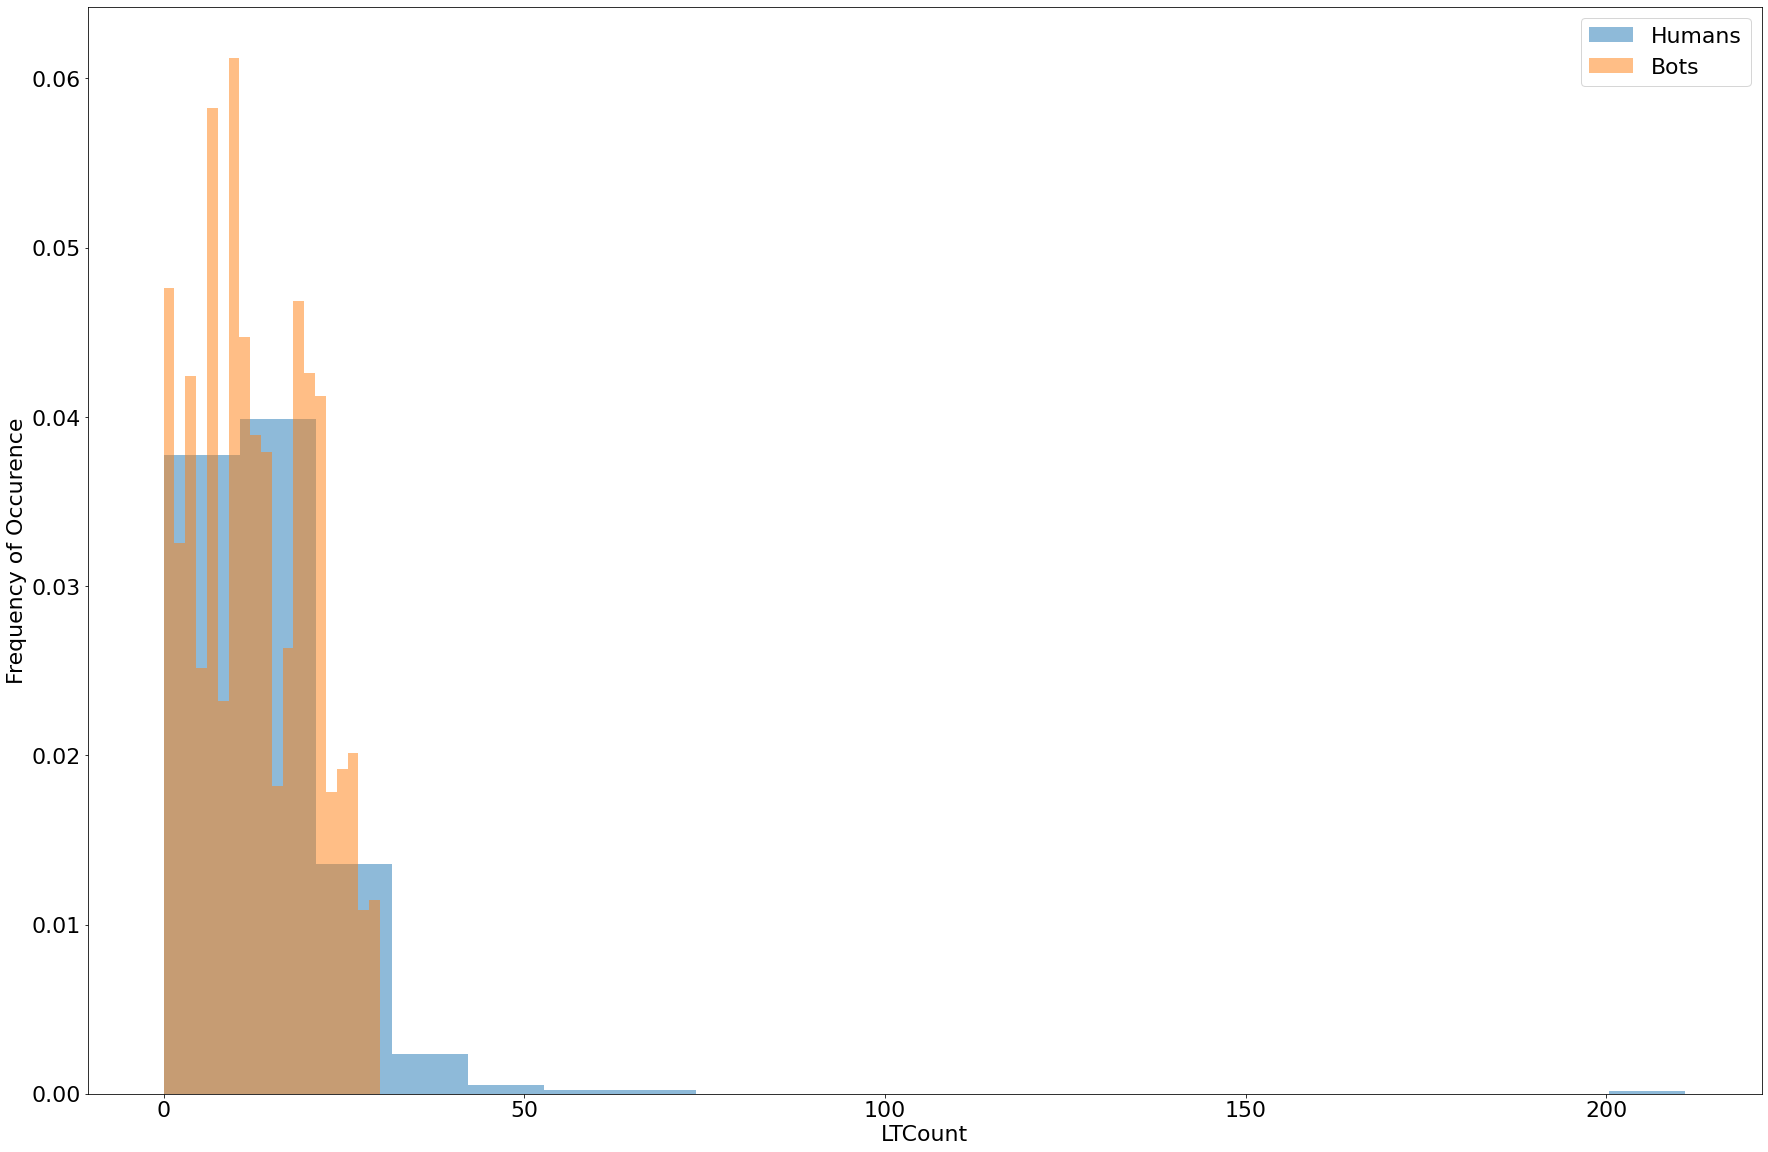

In [57]:
plt.figure(figsize=[30,20])

plt.rcParams.update({'font.size': 22})

matplotlib.pyplot.hist(dfLTCHum['LTCount'], weights=dfLTCHum['LTCount'] / len(dfLTCHum.columns),density=True,alpha = 0.5,bins=20)
matplotlib.pyplot.hist(dfLTCBo['LTCount'], weights=dfLTCBo['LTCount'] / len(dfLTCBo.columns),density=True,alpha = 0.5,bins=20)
plt.ylabel("Frequency of Occurence")
plt.xlabel("LTCount")
plt.legend(["Humans","Bots"])

plt.show()
# plt.savefig('Time between Tweets.pdf',bbox_inches='tight')

In [58]:
dfTwoHop = pd.merge(dfTwoHop,dfLTC, how = 'left',on = ['SourceID'] )
dfTwoHop

,Ignore,SourceID,TargetID,Label_Source,Label_Target,LTCount,Label
0,1647273198,2569574719,532385570,human,human,1,human
1,1647273198,2569574719,532385570,human,human,1,human
2,1647273198,2569574719,532385570,human,human,1,human
3,1647273198,2569574719,532385570,human,human,1,human
4,1647273198,2569574719,532385570,human,human,1,human
...,...,...,...,...,...,...,...
118897,1647273198,245821992,2402374440,human,human,0,human
118898,1647273198,37398014,20959178,human,human,9,human
118899,1647273198,16225240,36728196,human,human,2,human
118900,1647273198,45511031,6613972,human,human,3,human


In [59]:
dfTempedge

,Ignore,SourceID,TimeoTweet0,TargetID,TimeoTweet,id,Label
0,1647165085,20447545,1643903487),950515308100000000,1643903487,NaN,human
1,1647165085,20447545,1644256781),24474499,1644256781,NaN,human
2,1647165085,20447545,1645040707),2288544606,1645040707,NaN,human
3,1647165085,20447545,1643116543),1306710236000000000,1643116543,NaN,human
4,1647165085,20447545,1645099741),1862099568,1645099741,NaN,human
...,...,...,...,...,...,...,...
156026,1647165085,759568438008291328,1647119157),759568438000000000,1647119157,NaN,human
156027,1647165085,759568438008291328,1647154032),2704681687,1647154032,NaN,human
156028,1647165085,7864222,1647106317),7864222,1647106317,NaN,human
156029,1647165085,7864222,1647106383),7864222,1647106383,NaN,human


In [60]:
dfProfileTA

,created_at_x,description,entities_x,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics_x,...,public_metrics_y,referenced_tweets,source,text,label_x,id_y,label_y,Occurence,DateDiff,label
0,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,"{'retweet_count': 26, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502425034840678402'}]",Twitter Web App,RT @whybansal: I've defended my PhD :) A big thank you to my advisers @boazbaraktcs and @neurobongo. \n\nYou can see my talk here https://t.c…,human,1217628182611927040,human,4,1.977602e+07,human
1,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,"{'retweet_count': 66, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502437837978755075'}]",Twitter Web App,"RT @PreetumNakkiran: this was a great read; particularly relevant to some of the ""debates"" in the current ML community, and interesting his…",human,1217628182611927040,human,4,1.977602e+07,human
2,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",1217628182611927040,"Cambridge, MA",boazbarak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,"{'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}",...,"{'retweet_count': 8245, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}","[{'type': 'retweeted', 'id': '1502061135725568003'}]",Twitter Web App,"RT @BarackObama: Over the last few weeks, we’ve seen people, organizations, and companies around the world stepping up to support the peopl…",human,1217628182611927040,human,4,1.977602e+07,human
3,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, '

In [61]:
dfProfileTA['id'] = dfProfileTA['id'].astype('int64')
dfProfileTA.dtypes

created_at_x           datetime64[ns, UTC]
description                         object
entities_x                          object
id                                   int64
location                            object
name                                string
pinned_tweet_id                    float64
profile_image_url                   object
protected                             bool
public_metrics_x                    object
url                                 object
username                            string
verified                              bool
withheld                            object
f/f                                float64
l/t                                float64
n/u                                float64
Unnamed: 0                          object
author_id                           string
conversation_id                    float64
created_at_y                       float64
entities_y                          object
id_x                               float64
in_reply_to

In [62]:
dfTime['ID']=dfTime['author_id'].astype('int64')

In [84]:
MergedData = pd.merge(dfTwoHop,dfcc, how = 'inner',on = ['SourceID'] )
# MergedData = pd.merge(MergedData,dfTempedge, how = 'inner',on = ['SourceID','TargetID'])
MergedData = MergedData.merge(dfProfileTA, how= 'inner', left_on =['SourceID'],right_on=['id'])
MergedData = MergedData.merge(dfPageRank, how= 'inner', left_on =['SourceID'],right_on=['SourceID'])
MergedData = MergedData.merge(dfTime, how= 'left', left_on =['SourceID'],right_on=['ID'])
MergedData = MergedData.merge(dfDegree, how= 'left', left_on =['SourceID'],right_on=['SourceID'])
MergedData = MergedData.merge(dfInf, how= 'left', left_on =['SourceID'],right_on=[1])
MergedData = MergedData.rename(columns={2:"Influence"})

MergedData["Label"] = MergedData["Label_Source"] + MergedData["Label_Target"]


MergedData.dtypes

/var/folders/qh/lc_s3cmd2v1__m12ckks3gnm0000gp/T/ipykernel_7701/2409915217.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Ignore_x'} in the result is deprecated and will raise a MergeError in a future version.
  MergedData = MergedData.merge(dfDegree, how= 'left', left_on =['SourceID'],right_on=['SourceID'])


SourceID                             int64
Ignore_x                             int64
SourceID_x                           int64
TargetID                             int64
Label_Source                        object
Label_Target                        object
LTCount                              int64
Label_x                             object
Ignore_y                             int64
batch                                int64
created_at_x           datetime64[ns, UTC]
description                         object
entities_x                          object
id                                   int64
location                            object
name                                string
pinned_tweet_id                    float64
profile_image_url                   object
protected                             bool
public_metrics_x                    object
url                                 object
username                            string
verified                              bool
withheld   

In [85]:
MergedData['Ignore_x'] = MergedData['Ignore_x'].astype('string')
MergedData = MergedData[['Ignore_x','SourceID','TargetID','Label_Source','Label_Target','Label','LTCount','batch','f/f','l/t','n/u','DateDiff','PR','verified','url','diff','In_degree','Out_degre','Degree','Influence']]


In [86]:
MergedData

,Ignore_x,Ignore_x,SourceID,TargetID,Label_Source,Label_Target,Label,LTCount,batch,f/f,...,n/u,DateDiff,PR,verified,url,diff,In_degree,Out_degre,Degree,Influence
0,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
1,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
2,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
3,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
4,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721745,1647273198,1647273198,16225240,36728196,human,human,humanhuman,2,12,0.001244,...,0.538462,1.092930e+08,0.276708,True,https://t.co/C6Lo5syKD6,54763.750000,2,2,3,0.161379
1721746,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841
1721747,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841
1721748,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841


In [87]:
# MergedData.drop(MergedData.tail(29075).index,
#         inplace = True)

MergedData = MergedData.reset_index(drop=True)
MergedData.to_csv('test.csv')
MergedData

,Ignore_x,Ignore_x,SourceID,TargetID,Label_Source,Label_Target,Label,LTCount,batch,f/f,...,n/u,DateDiff,PR,verified,url,diff,In_degree,Out_degre,Degree,Influence
0,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
1,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
2,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
3,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
4,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721745,1647273198,1647273198,16225240,36728196,human,human,humanhuman,2,12,0.001244,...,0.538462,1.092930e+08,0.276708,True,https://t.co/C6Lo5syKD6,54763.750000,2,2,3,0.161379
1721746,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841
1721747,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841
1721748,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841


In [67]:
dfPageRank

,Ignore,SourceID,PR
0,1647273198,20447545,0.163934
1,1647273198,2306902405,0.226629
2,1647273198,947187803000000000,0.155312
3,1647273198,31457769,0.150000
4,1647273198,371201577,0.260870
...,...,...,...
297745,1647273198,1136308059000000000,0.190476
297746,1647273198,295693924,0.175500
297747,1647273198,2776586882,0.164543
297748,1647273198,1060332329000000000,0.159808


In [68]:
dfLabel = dfLabel.rename(columns={"id":"SourceID"})
dfPageRank = dfPageRank.merge(dfLabel, how = 'left', on =['SourceID'])
dfPageRankB = dfPageRank[dfPageRank['Label']=='bot']
dfPageRankH = dfPageRank[dfPageRank['Label']=='human']

In [69]:
dfPageRank

,Ignore,SourceID,PR,Label
0,1647273198,20447545,0.163934,human
1,1647273198,2306902405,0.226629,NaN
2,1647273198,947187803000000000,0.155312,NaN
3,1647273198,31457769,0.150000,human
4,1647273198,371201577,0.260870,human
...,...,...,...,...
297745,1647273198,1136308059000000000,0.190476,NaN
297746,1647273198,295693924,0.175500,human
297747,1647273198,2776586882,0.164543,NaN
297748,1647273198,1060332329000000000,0.159808,NaN


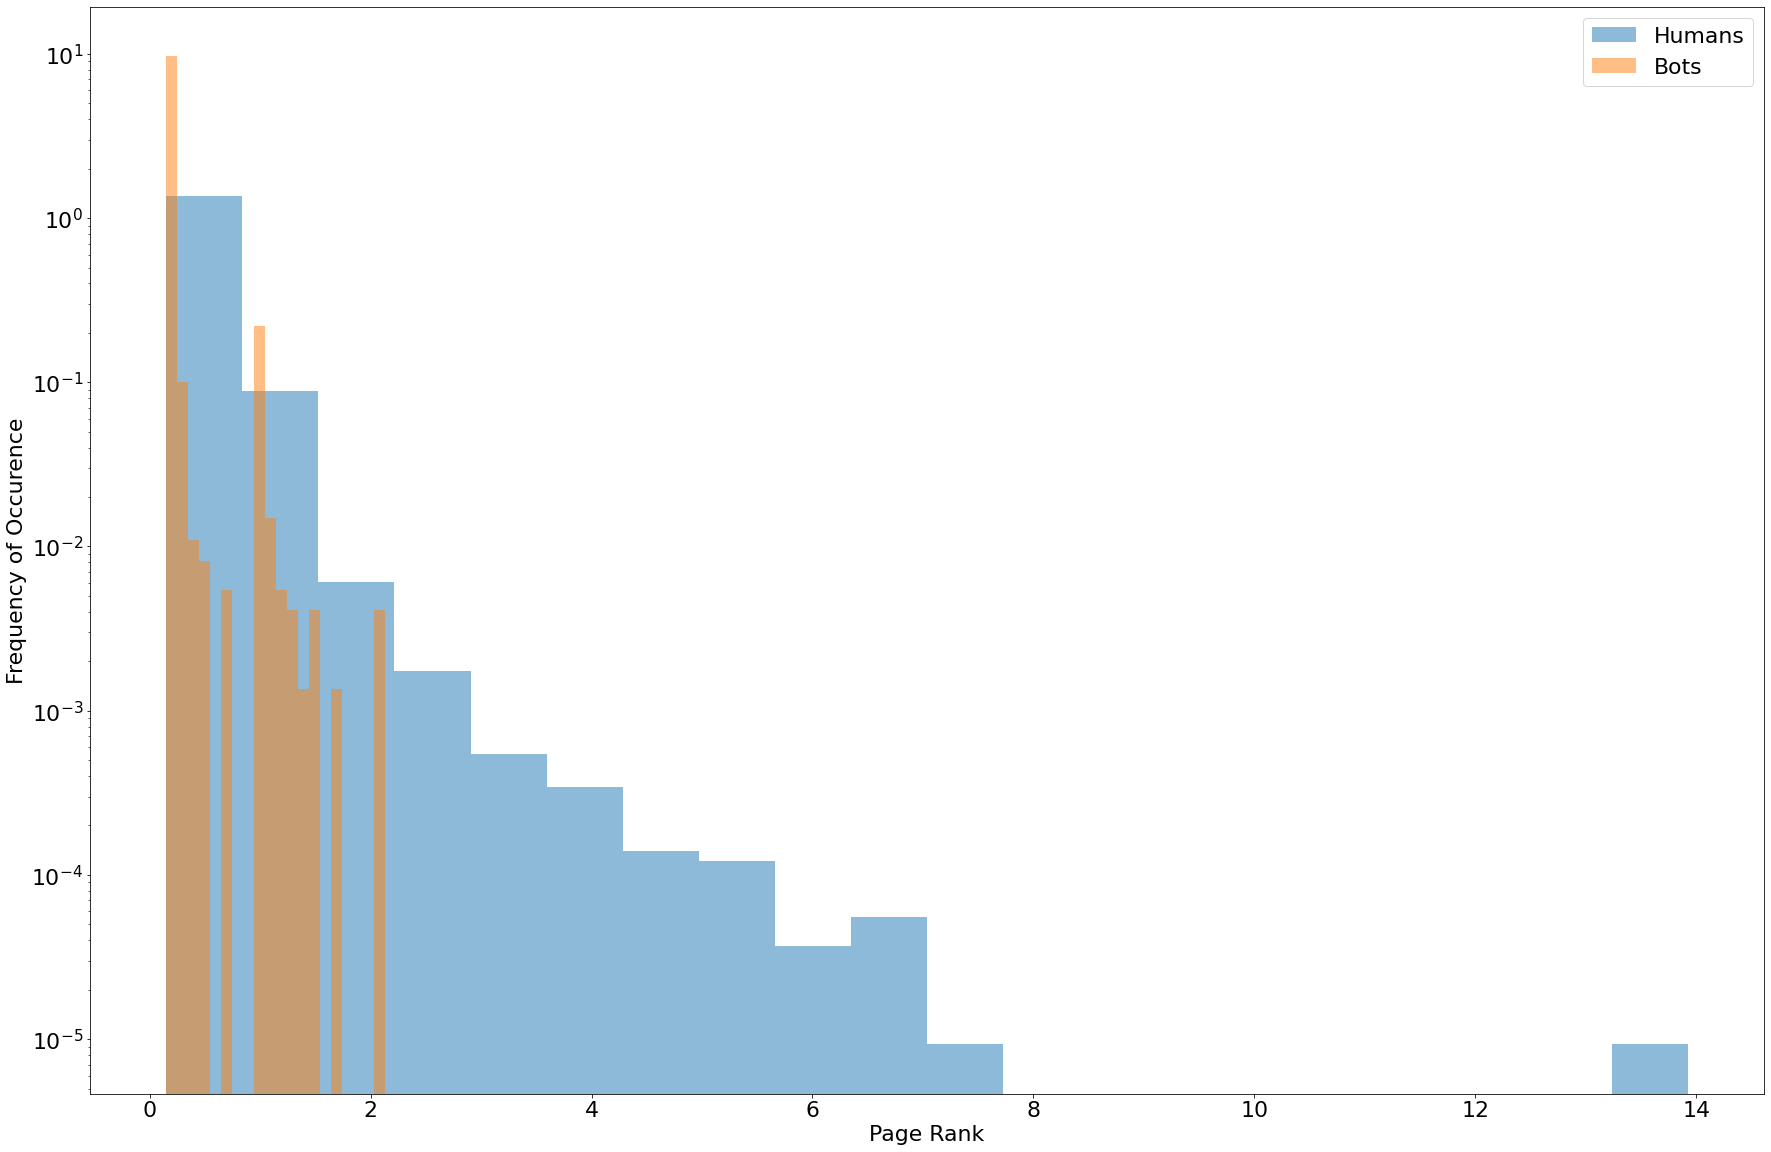

In [70]:
plt.figure(figsize=[30,20])

plt.rcParams.update({'font.size': 22})
matplotlib.pyplot.hist(dfPageRankH['PR'], density=True,alpha = 0.5,bins=20, log =True)
matplotlib.pyplot.hist(dfPageRankB['PR'],density=True,alpha = 0.5,bins=20, log =True)

plt.ylabel("Frequency of Occurence")
plt.xlabel("Page Rank")
plt.legend(["Humans","Bots"])

(array([3.5300e+02, 5.7500e+02, 4.8100e+02, 3.9600e+02, 4.1000e+02,
        4.2200e+02, 4.2300e+02, 4.3700e+02, 4.7100e+02, 4.5800e+02,
        4.5600e+02, 4.8000e+02, 4.7700e+02, 5.0800e+02, 5.3400e+02,
        5.2200e+02, 5.6900e+02, 5.5400e+02, 5.4800e+02, 6.1900e+02,
        5.8700e+02, 6.6300e+02, 6.9000e+02, 7.1000e+02, 6.4400e+02,
        7.1500e+02, 7.4000e+02, 7.6100e+02, 7.7700e+02, 7.4300e+02,
        7.4700e+02, 7.6000e+02, 7.8200e+02, 8.2100e+02, 8.3600e+02,
        8.0600e+02, 8.3200e+02, 7.9200e+02, 7.9100e+02, 7.8000e+02,
        8.1700e+02, 7.2300e+02, 9.6400e+02, 7.1800e+02, 6.6400e+02,
        6.3300e+02, 5.7000e+02, 5.8200e+02, 5.2400e+02, 4.7700e+02,
        4.7000e+02, 4.2600e+02, 4.6300e+02, 3.7000e+02, 3.8400e+02,
        3.2300e+02, 3.1000e+02, 3.0000e+02, 2.7700e+02, 2.6700e+02,
        2.4400e+02, 2.1100e+02, 2.1900e+02, 2.1900e+02, 2.0500e+02,
        1.7400e+02, 1.7200e+02, 1.7600e+02, 1.8100e+02, 1.8000e+02,
        1.3400e+02, 1.5500e+02, 1.5700e+02, 1.45

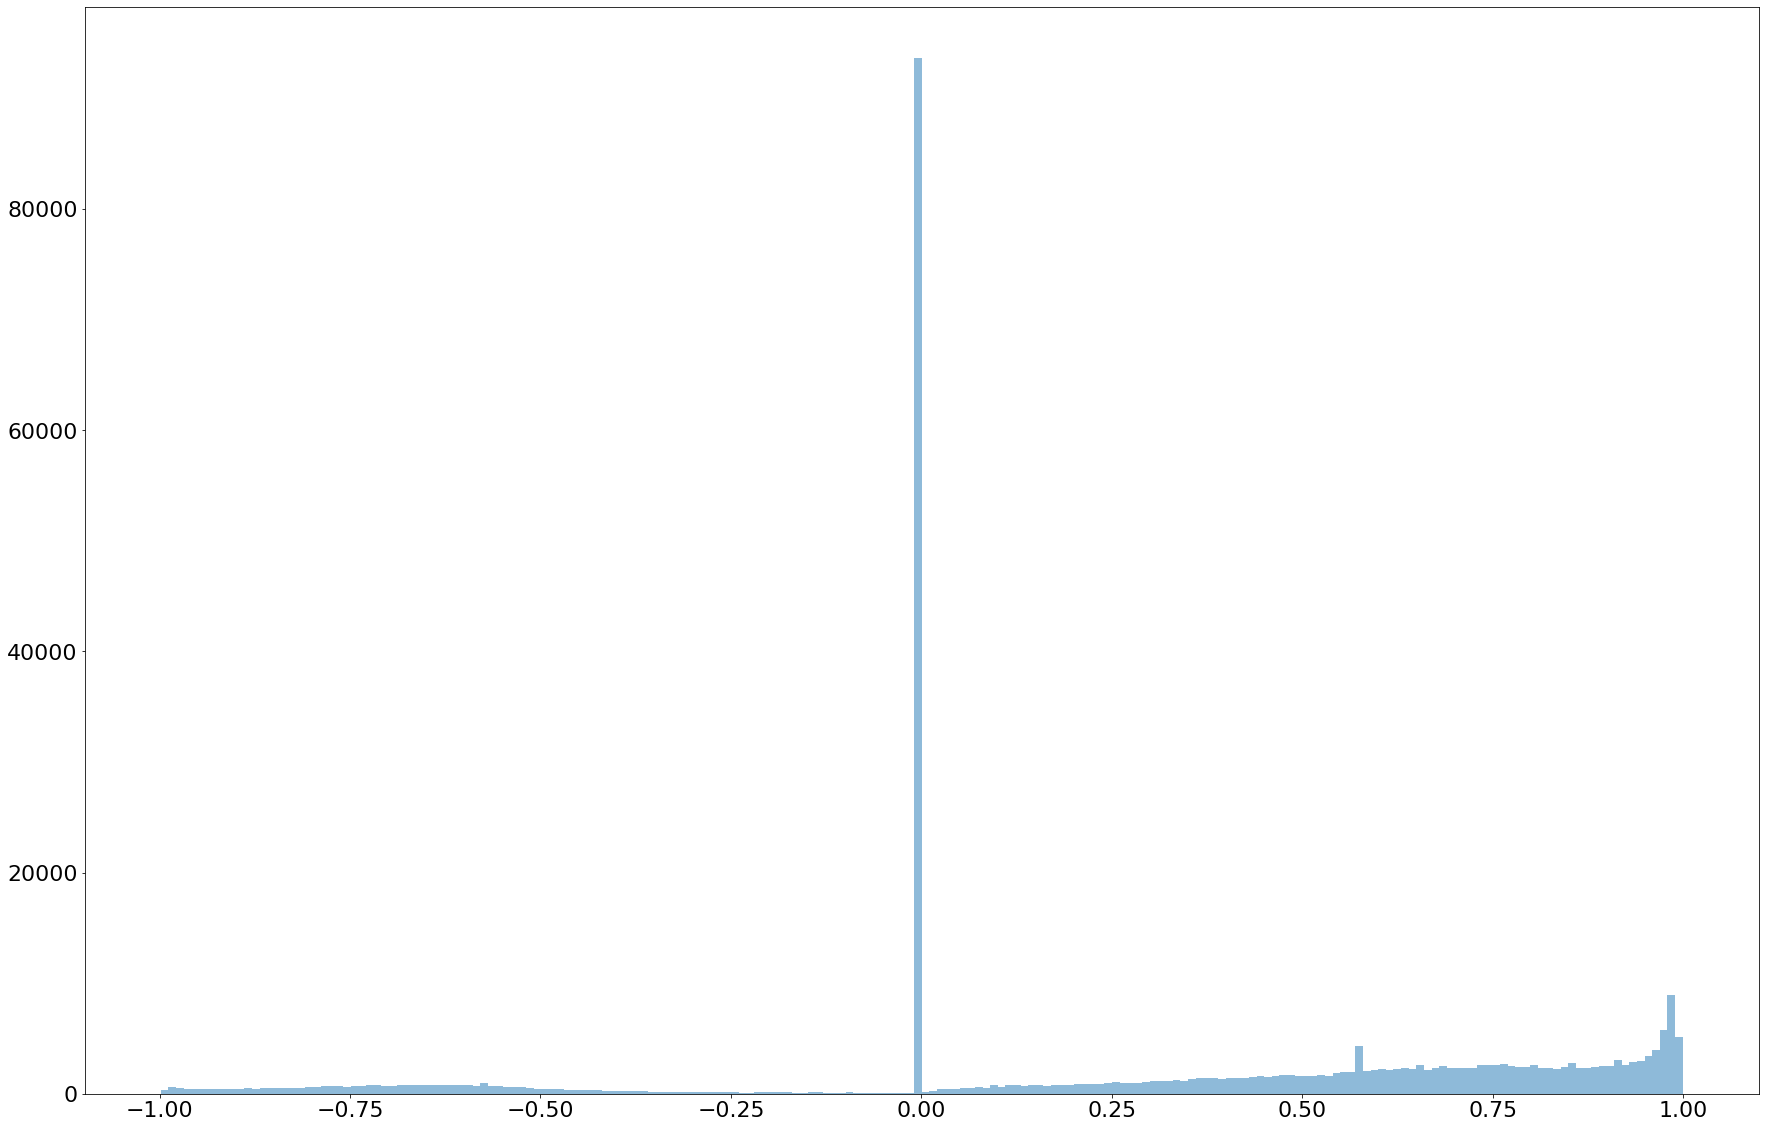

In [71]:
plt.figure(figsize=[30,20])

matplotlib.pyplot.hist(dfInf[2],alpha = 0.5,bins=200)


In [72]:
dfInf

,0,1,2
0,1658781456,20447544,0.930877
1,1658781456,371201568,0.490955
2,1658781456,1719690880,0.774699
3,1658781456,20447545,-0.536559
4,1658781456,2198373120,0.755548
...,...,...,...
318674,1658781456,1371804205401395202,0.000000
318675,1658781456,295693924,0.000000
318676,1658781456,930962549574475777,-0.632070
318677,1658781456,295693920,0.864801


In [73]:
dfInf=dfInf.merge(dfLabel,how='inner',right_on='SourceID',left_on=1)
dfInf= dfInf[dfInf[2]!=0]
dfInfBO = dfInf[dfInf['Label']=='bot']
dfInfHum= dfInf[dfInf['Label']=='human']

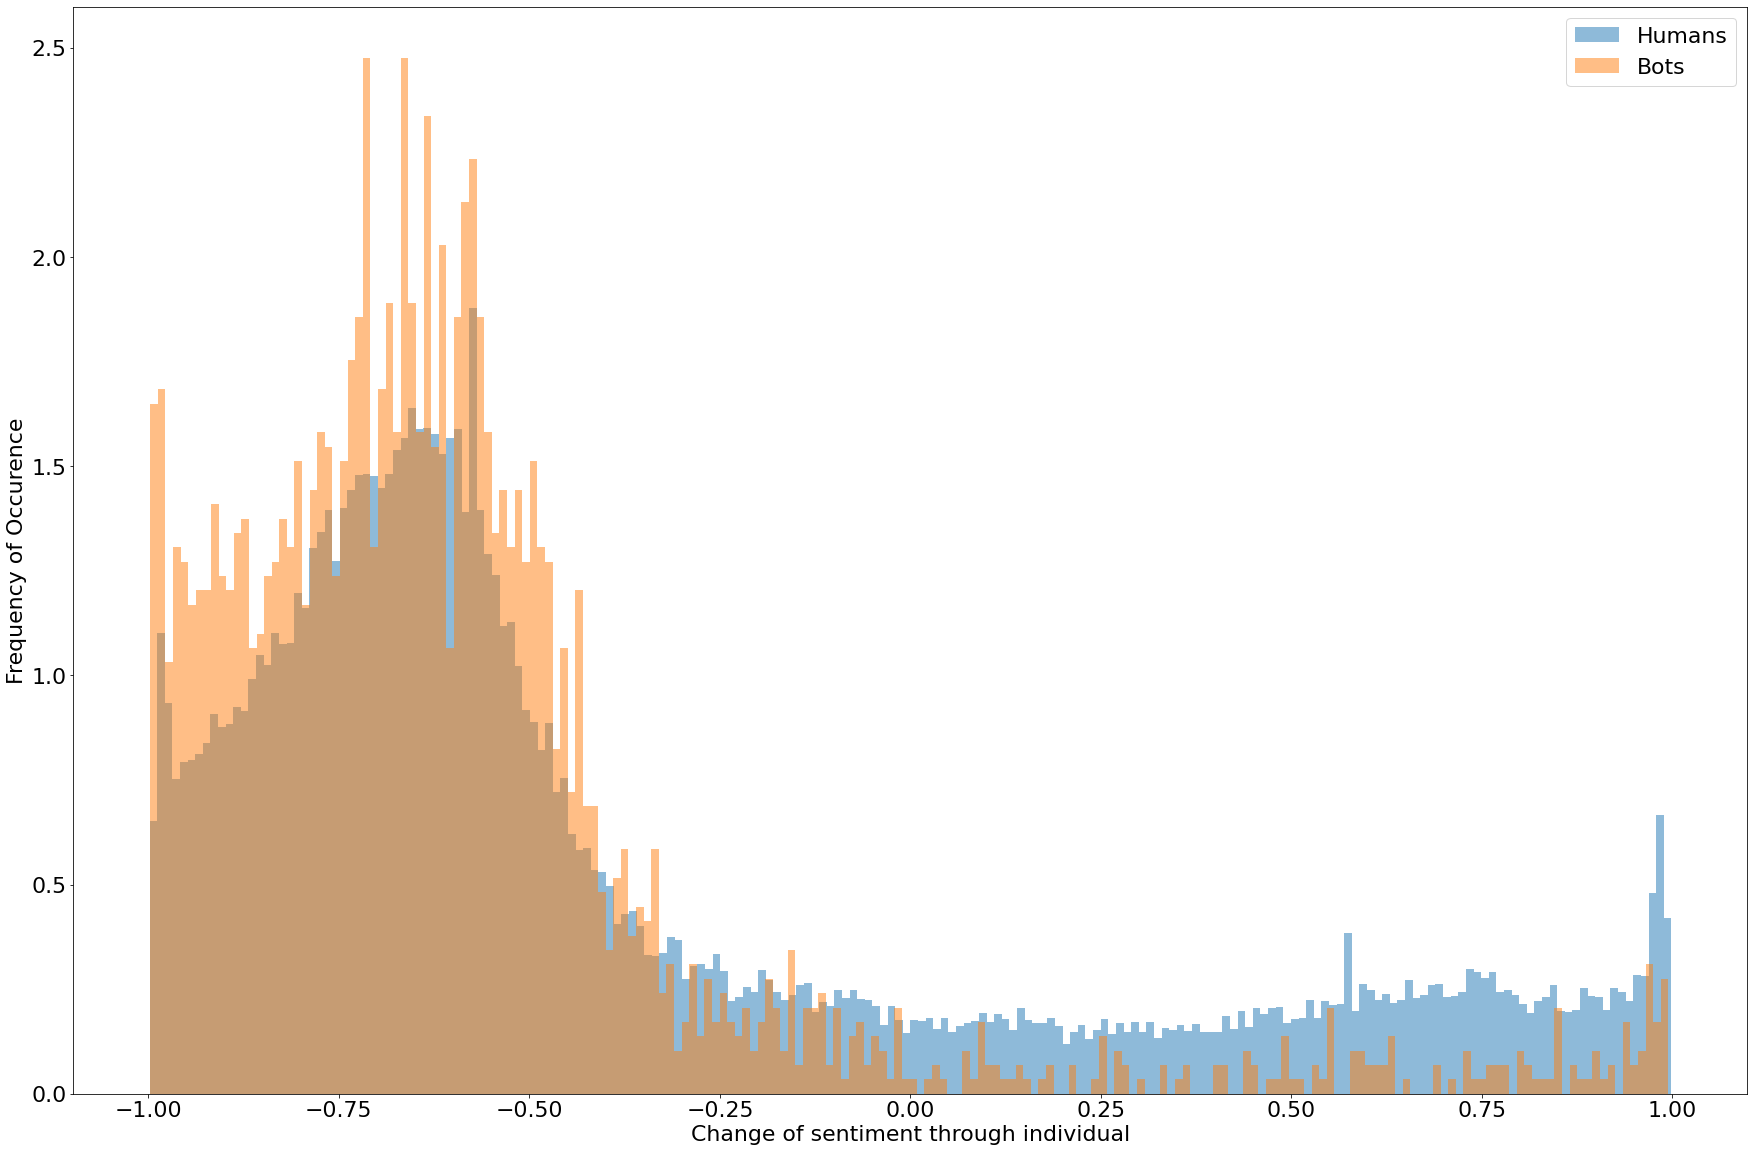

In [74]:
plt.figure(figsize=[30,20])

plt.rcParams.update({'font.size': 22})
matplotlib.pyplot.hist(dfInfHum[2], density=True,alpha = 0.5,bins=200)
matplotlib.pyplot.hist(dfInfBO[2],density=True,alpha = 0.5,bins=200)

plt.ylabel("Frequency of Occurence")
plt.xlabel("Change of sentiment through individual")
plt.legend(["Humans","Bots"])

In [92]:
MergedData

,Ignore_x,Ignore_x,SourceID,TargetID,Label_Source,Label_Target,Label,LTCount,batch,f/f,...,n/u,DateDiff,PR,verified,url,diff,In_degree,Out_degre,Degree,Influence
0,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
1,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
2,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
3,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
4,1647273198,1647273198,2569574719,532385570,human,human,humanhuman,1,12,0.122713,...,0.846154,1.344119e+07,0.150000,True,https://t.co/9j3fABG5aR,82824.421053,0,12,12,-0.781430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721745,1647273198,1647273198,16225240,36728196,human,human,humanhuman,2,12,0.001244,...,0.538462,1.092930e+08,0.276708,True,https://t.co/C6Lo5syKD6,54763.750000,2,2,3,0.161379
1721746,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841
1721747,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841
1721748,1647273198,1647273198,45511031,6613972,human,human,humanhuman,3,12,0.157886,...,0.800000,1.034509e+08,0.306449,True,https://t.co/VPHuM6by1f,308119.750000,2,2,3,-0.625841
